### FASE 1: 
### EXPLORACIÓN Y LIMPIEZA

1. EXPLORACIÓN INICIAL:

In [149]:
# Importo las librerias necesarias para trabajar.

import pandas as pd
import numpy as np

# Librería para visualizar todas las columnas de los DataFrames

pd.set_option('display.max_columns', None)

In [150]:
# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [151]:
# Visualización

import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables

from scipy.stats import shapiro, kstest
from scipy import stats



In [152]:
# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [153]:
# Carga de los datos con los que vamos a trabajar.

df_clients= pd.read_csv('Customer Loyalty History.csv')
df_activity= pd.read_csv('Customer Flight Activity.csv')


In [154]:
# Leemos cada uno de los df para visualizar qué contenido tiene, en este caso le pido que me de 10 filas aleatorias para una exploración incial del contenido de cada uno de los df.

df_clients.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
10894,244296,Canada,Ontario,Toronto,M2M 7K8,Male,High School or Below,52209.0,Married,Star,2523.96,Standard,2014,2,NaN,NaN
15639,171937,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,48445.0,Married,Star,10394.36,Standard,2016,5,NaN,NaN
13161,286641,Canada,Ontario,Toronto,M2P 4F6,Male,Bachelor,87793.0,Divorced,Star,4886.54,Standard,2012,10,NaN,NaN
2941,689477,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,100140.0,Married,Aurora,9445.65,Standard,2013,2,NaN,NaN
4408,712521,Canada,Ontario,Ottawa,K1F 2R2,Male,Bachelor,78245.0,Divorced,Nova,2849.25,Standard,2015,9,NaN,NaN
11976,297218,Canada,Quebec,Montreal,H2T 9K8,Male,Bachelor,70669.0,Single,Star,2886.23,Standard,2017,5,NaN,NaN
8591,559124,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,71815.0,Married,Nova,9591.23,Standard,2018,5,NaN,NaN
8886,862097,Canada,Quebec,Montreal,H2T 9K8,Male,College,NaN,Single,Nova,11572.10,Standard,2018,12,NaN,NaN
1382,842980,Canada,Ontario,Toronto,P1W 1K4,Male,Bachelor,65088.0,Married,Aurora,5677.47,Standard,2018,8,NaN,NaN
6604,404011,Canada,British Columbia,Victoria,V10 6T5,Female,Bachelor,69401.0,Single,Nova,5365.98,Standard,2012,5,NaN,NaN


In [155]:
df_activity.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
283202,365557,2018,9,7,1,8,1800,180.0,561,45
124296,421310,2017,8,0,0,0,0,0.0,0,0
311701,788283,2018,6,0,0,0,0,0.0,0,0
44212,653340,2017,3,15,8,23,4025,402.0,0,0
217739,893863,2018,1,2,2,4,1608,160.0,0,0
266604,683288,2018,7,0,0,0,0,0.0,0,0
6205,432059,2017,1,0,0,0,0,0.0,0,0
242742,556453,2018,2,11,3,14,1736,259.5,0,0
394939,432493,2018,12,16,5,21,3108,310.0,0,0
78180,663150,2017,5,3,3,6,1704,170.0,0,0


In [156]:
# Consulto que dimensiones (filas y columnas) y qué columnas contiene cada df para tener una visión general de la cantidad de datos que contiene.
# Además podré acceder a los nombres de las variables con mayor facilidad para el posterior trabajo.

def info_df(df_clients, df_activity):
    print(f"Shape df_clients: {df_clients.shape}\nColumnas df_clients: {list(df_clients.columns)}\n")
    print(f"Shape df_activity: {df_activity.shape}\nColumnas df_activity: {list(df_activity.columns)}")

In [157]:
info_df(df_clients,df_activity)

Shape df_clients: (16737, 16)
Columnas df_clients: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']

Shape df_activity: (405624, 10)
Columnas df_activity: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


In [158]:
# Investigo si existen duplicados, tanto en df_clients como en df_activity.

def info_duplicados(df_clients, df_activity):
    print(f"Duplicados df_clients: {df_clients.duplicated().sum()}\n")
    print(f"Duplicados df_activity: {df_activity.duplicated().sum()}\n")

In [159]:
# Me aparecen en df_activity un total de 1864 duplicados, los cuales tengo que investigar para ver que hago con ellos.

info_duplicados(df_clients, df_activity)

Duplicados df_clients: 0

Duplicados df_activity: 1864



In [160]:
# Compruebo en qué columnas existen duplicados.

columnas_con_duplicados = []

for col in df_activity.columns:
    if df_activity[col].duplicated().any():
        columnas_con_duplicados.append(col)

print("Columnas con valores duplicados:", columnas_con_duplicados)

Columnas con valores duplicados: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


In [161]:
# Compruebo en qué filas se encuentran los valores duplicados para poder tratarlos.

filas_duplicadas = df_activity[df_activity.duplicated(keep=False)]
print("Filas con valores duplicados:",filas_duplicadas)

Filas con valores duplicados:         Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
41              101902  2017      1               0                        0   
42              101902  2017      1               0                        0   
226             112142  2017      1               0                        0   
227             112142  2017      1               0                        0   
477             126100  2017      1               0                        0   
...                ...   ...    ...             ...                      ...   
405111          971370  2018     12               0                        0   
405409          988392  2018     12               0                        0   
405410          988392  2018     12               0                        0   
405436          989528  2018     12               0                        0   
405437          989528  2018     12               0                        0   

        T

In [162]:
# Elimino las filas duplicadas para que no nos falsee los resultados posteriores. 

# En este caso he escogido en keep= 'last' para quedarme con la ultima fila añadida de las duplicadas, por coger de todos los valores duplicados el incluido más recientemente.

# Realizo el borrado en un nuevo df al que llamo 'df_sin_duplicados' para no modificar el df original (df_activity).

df_sin_duplicados = df_activity.drop_duplicates(keep='last')


In [163]:
# Compruebo que en 'filas_duplicadas' creada anteriormente para la comprobación de duplicadas ahora se encuentra vacía tras la eliminación.

filas_duplicadas = df_sin_duplicados[df_sin_duplicados.duplicated(keep=False)]
print(filas_duplicadas)

Empty DataFrame
Columns: [Loyalty Number, Year, Month, Flights Booked, Flights with Companions, Total Flights, Distance, Points Accumulated, Points Redeemed, Dollar Cost Points Redeemed]
Index: []


In [164]:
# Compruebo que el dataframe aparece correctamente tras la eliminación.

df_sin_duplicados.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
86254,194640,2017,6,15,10,25,4050,405.0,0,0
229428,602384,2017,8,0,0,0,0,0.0,0,0
31274,863219,2017,2,9,0,9,2367,236.0,0,0
362012,478666,2018,10,0,0,0,0,0.0,0,0
202203,967490,2017,12,6,0,6,3132,313.0,0,0
284056,825484,2018,5,11,0,11,2156,215.0,0,0
213021,642901,2018,1,3,3,6,2874,287.0,0,0
43885,636177,2017,3,6,3,9,1872,187.0,0,0
265409,732377,2018,4,0,0,0,0,0.0,0,0
385241,813320,2018,11,0,0,0,0,0.0,0,0


In [165]:
# Compruebo la dimension del nuevo df sin duplicados. 
# Nos da correctamente. Df_activity tenia 405.624 filas de las cuales 1864 estaban duplicados. Ahora, df_sin duplicados tiene 403.760 filas (justo las 1864 menos anteriormente duplicadas) 
# En cuanto a las columnas sigue correcamente las 10, que no las hemos tocado.

df_sin_duplicados.shape

(403760, 10)

In [166]:
# Unifico los df 'df_clients' y 'df_sin_duplicados' (anteriormente 'df_activity') en un solo df que contenga toda la info al que nombro como 'df_merge'.

# Quiero quedarme con todos los clientes, tengan o no actividad registrada en 'df_activity'. Por ello, uso un left.

# Utilizo merge porque tienen en común la columna 'Loyalty Number' y a partir de ahí realizo la unión.

# Lo muestro para ver que se ha realizado correctamente la unión.

df_merge= pd.merge(df_clients, df_sin_duplicados, on='Loyalty Number', how='left')
df_merge.sample(15)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
379665,233969,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,81355.0,Married,Star,11014.16,Standard,2017,4,NaN,NaN,2017,8,9,7,16,5072,507.00,625,50
397578,883916,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,62440.0,Married,Star,23055.57,Standard,2015,9,2016.0,5.0,2017,11,0,0,0,0,0.00,0,0
266654,313732,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,87330.0,Married,Star,2552.04,Standard,2013,10,NaN,NaN,2018,10,0,0,0,0,0.00,0,0
251983,254940,Canada,British Columbia,Whistler,V6T 1Y8,Female,College,NaN,Single,Star,2426.96,Standard,2014,4,NaN,NaN,2018,2,0,0,0,0,0.00,0,0
219622,494438,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,81672.0,Divorced,Nova,13295.60,Standard,2017,1,2017.0,5.0,2017,8,0,0,0,0,0.00,0,0
232148,536371,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,82573.0,Single,Nova,23086.36,Standard,2018,6,NaN,NaN,2018,4,0,0,0,0,0.00,0,0
147,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN,2018,4,7,0,7,1974,212.76,0,0
346963,740608,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Master,123546.0,Divorced,Star,6913.57,Standard,2015,12,NaN,NaN,2017,8,18,2,20,3920,392.00,583,47
201481,763224,Canada,Quebec,Montreal,H2T 2J6,Male,High School or Below,77822.0,Married,Nova,8759.59,Standard,2018,9,NaN,NaN,2017,5,0,0,0,0,0.00,0,0
80325,657980,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,64417.0,Single,Aurora,12036.62,Standard,2015,3,2015.0,8.0,2018,2,0,0,0,0,0.00,0,0


In [167]:
# Consulto con .shape las dimensiones del nuevo df_merge. Vemos Se han unido todas las columnas de los anteriores dataframe
def info_df(df_merge):
    print(f"Shape df_merge: {df_merge.shape}\nColumnas df_merge: {list(df_merge.columns)}\n")
    

In [168]:
info_df(df_merge)

Shape df_merge: (403760, 25)
Columnas df_merge: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']



2. LIMPIEZA DE DATOS:

In [169]:
# REVISIÓN DE NULOS del dataframe completo df_merge.

#Saco el % de nulos y cojo 1 decimal. Imprimo únicamente aquella información de columnas que tienen nulos.

porcentaje_nulos = df_merge.isnull().sum()/df_merge.shape[0]*100
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0].round(1)
porcentaje_nulos

Salary                25.3
Cancellation Year     87.7
Cancellation Month    87.7
dtype: float64

In [170]:
# Nombro la columna de porcentaje de nulos y ordeno de mayor a menor en una visualización de dataframe para mayor claridad.

porcentaje_nulos = porcentaje_nulos.to_frame(name='porcentaje_nulos').reset_index().rename(columns={'index': 'var'}).sort_values(by='porcentaje_nulos', ascending=False)
porcentaje_nulos

,var,porcentaje_nulos
1,Cancellation Year,87.7
2,Cancellation Month,87.7
0,Salary,25.3


In [171]:
# Observo en el dataframe anterior que los valores nulos del salario coincide con la categoría 'collage' de la columna educación.

# Compruebo entonces que valores hay dentro de salario en dicha categoría.

# Queda comprobado que en la categoria college solo hay valores nulos en la columna salario. 

df_college = df_merge[df_merge['Education'] == 'College']
print(df_college['Salary'].unique())


[nan]


__Conclusiones:__

- Tenemos 3 columnas 'Cancellation Year', 'Cancellation Month' y 'Salary' con valores nulos.

- Altos porcentajes (87,7%) de nulos en __'Cancellation Year','Cancellation Month'__. En este caso, significa que los datos que aparecen como nulos es que __no han tenido cancelaciones__. Por lo que los voy a dejar tal cual para no falsearlos.

- En la columna __'Salary' tenemos un 25.3% de nulos__. Tras analizar este porcentaje, veo que los valores de salario que faltan son __de la categoria de nivel de estudio 'college'__. Por lo que __no es un nulo aleatorio__, si no que son estudiantes que no tienen salario. Lo tomo como un dato a tener en cuenta en el análisis por lo que __los reemplazo por 0.0, es decir, quedaría como que no tienen salario y podremos tenerlo en cuenta para las operaciones posteriores__.

In [172]:
# Vemos que tipo de variables son nuestras columnas con nulos:

    # a. Salary--> float64 (está OK)
    # b. Cancellation Year--> float (cambiar a int)
    # c. Cancellation Month--> float (cambiar a int '1 a 12')

df_merge.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [173]:
# a. Sustituyo el valor nulo Nan por 0.0 en Salario para la categoria college de educación.

df_merge['Salary'] = df_merge['Salary'].fillna(0.0)


In [174]:
# Compruebo que está reemplazado el valor Nan por 0.0 en Salary (Education--> college)
df_merge.sample(15)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
179310,347629,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,0.0,Married,Nova,6912.04,Standard,2017,6,NaN,NaN,2017,10,6,6,12,2028,202.0,0,0
147861,130032,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Doctor,330419.0,Married,Nova,25640.24,2018 Promotion,2018,3,NaN,NaN,2018,12,0,0,0,0,0.0,0,0
236357,955463,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,71130.0,Married,Nova,37243.63,Standard,2013,10,NaN,NaN,2017,1,6,0,6,1620,162.0,0,0
399236,704149,Canada,Quebec,Montreal,H2T 2J6,Female,Bachelor,48525.0,Married,Star,25805.27,Standard,2013,4,NaN,NaN,2018,1,6,1,7,1582,158.0,0,0
154824,244865,Canada,British Columbia,Victoria,V10 6T5,Female,Bachelor,62044.0,Single,Nova,5100.74,Standard,2017,9,NaN,NaN,2018,6,13,2,15,1350,135.0,0,0
22196,182587,Canada,Ontario,Toronto,M2P 4F6,Male,College,0.0,Single,Aurora,5156.07,Standard,2014,1,2017.0,12.0,2017,7,7,7,14,4004,400.0,0,0
293553,668253,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,77914.0,Divorced,Star,3230.58,Standard,2013,4,NaN,NaN,2017,2,0,0,0,0,0.0,0,0
374359,927848,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,53496.0,Single,Star,9656.21,Standard,2016,7,NaN,NaN,2017,4,6,0,6,1086,108.0,0,0
269420,455896,Canada,Ontario,Toronto,P1W 1K4,Male,Bachelor,66226.0,Married,Star,2580.85,Standard,2013,1,NaN,NaN,2017,8,0,0,0,0,0.0,0,0
373487,713831,Canada,Prince Edward Island,Charlottetown,C1A 6E8,Female,College,0.0,Divorced,Star,9435.54,Standard,2013,1,NaN,NaN,2018,8,11,5,16,4144,414.0,0,0


In [175]:
# b. cambio el type a 'Cancellation Year' de float --> int64 (permite los Nan y trabajar con enteros)

df_merge['Cancellation Year'] = df_merge['Cancellation Year'].astype('Int64')


In [176]:
# c. cambio el type a 'Cancellation Month' de float --> int64 (permite los Nan y trabajar con enteros)

df_merge['Cancellation Month'] = df_merge['Cancellation Month'].astype('Int64')

In [177]:
# Compruebo que se ha hecho el cambio correctamente. 

df_merge.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                Int64
Cancellation Month               Int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

__Conclusiones:__

- Entiendo que al ser la variable 'Points Accumulated' de tipo float64, convertiré la variable 'Points Redeemed' también a float64 ya que se trata del mismo tipo de valor (puntos).

- En el caso de la variable 'Dollar Cost Points Redeemed' es int64 y la convertiré en float64. 

- En el caso de 'Distancia', considero convertirlo a float64 para ser mas exactos dejando incluir metros. Ejemplo 670,8 km.

- Para las variables de 'Year' y 'Month', creo más acertado dejarlo tal y como están, ya que están separados en columnas y no es una fecha completa. Por ello, he decidido no pasarlo a datetime. 

In [181]:
# Realizo el cambio de tipo de variables.

def convertir_columnas_a_float(df_merge):
    columnas = ['Points Redeemed', 'Dollar Cost Points Redeemed', 'Distance']
    for col in columnas:
        df_merge[col] = df_merge[col].astype('float64')
    return df_merge

In [ ]:
# Compruebo si se ha realizado el cambio correctamente.

df_merge = convertir_columnas_a_float(df_merge)
df_merge.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                Int64
Cancellation Month               Int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                       float64
Points Accumulated             float64
Points Redeemed                float64
Dollar Cost Points Redeemed    float64
dtype: object

In [184]:
df_merge.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
53978,557739,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,75946.0,Divorced,Aurora,7664.22,Standard,2013,4,<NA>,<NA>,2017,6,11,4,15,5190.0,519.0,0.0,0.0
264533,863280,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,73339.0,Married,Star,2537.81,Standard,2018,6,<NA>,<NA>,2018,1,0,0,0,0.0,0.0,0.0,0.0
250019,421310,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,0.0,Married,Star,2398.33,Standard,2012,6,<NA>,<NA>,2018,11,0,0,0,0.0,0.0,0.0,0.0
62924,322169,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,81078.0,Divorced,Aurora,8481.31,Standard,2017,5,<NA>,<NA>,2018,12,9,1,10,1280.0,128.0,0.0,0.0
333491,830777,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,77443.0,Divorced,Star,5592.46,Standard,2013,4,<NA>,<NA>,2017,4,4,4,8,2984.0,298.0,439.0,36.0
130777,665374,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,100395.0,Married,Nova,3763.64,Standard,2016,2,2016,10,2017,11,0,0,0,0.0,0.0,0.0,0.0
274704,566663,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,90600.0,Divorced,Star,2623.32,Standard,2015,9,2016,10,2018,2,0,0,0,0.0,0.0,0.0,0.0
104204,327019,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,56235.0,Married,Nova,2801.56,Standard,2018,10,<NA>,<NA>,2017,9,0,0,0,0.0,0.0,0.0,0.0
18237,181726,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,67132.0,Single,Aurora,4974.87,Standard,2013,9,<NA>,<NA>,2018,12,11,0,11,3223.0,322.0,0.0,0.0
85108,101487,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,91817.0,Married,Aurora,14024.36,Standard,2012,12,<NA>,<NA>,2017,2,9,5,14,1512.0,151.0,0.0,0.0


In [180]:
# Compruebo los duplicados nuevamente para asegurarme de que no hay antes de continuar.

df_merge.duplicated().sum()

0

In [193]:
# Guardo el dataframe ya tratado en formato csv para trabajar con ello más fácilmente.

df_merge.to_csv('df_merge.csv', index=False)


__Finalizacón fase 1:__

A modo resumen de lo realizado en esta fase 1, se ha realizado:

1. __Exploración__ inicial de los datos.

2. __Unión__ de los dos dataframes iniciales en un único dataframe.

3. __Identificación, análisis y tratamiento__ de valores nulos.

4. __Identificación, análisis  y tratamiento__ de duplicados.

5. __Uso de funciones__ tanto para encontrar información sobre la estructura de datos como para la coversión de tipo de datos.

6. Verificar la __consistencia y corrección__ de los datos.

7. __Ajustes y conversión__ de los tipos de datos de las variables para el análisis estadístico.

8. Guardo nuevo dataframe como archivo csv.

 

### FASE 2: 
### VISUALIZACIÓN

In [194]:
# Librerías importadas al principio del archivo para tenerlas todas ubicadas en un mismo sitio. 
# Cargo los datos. De esta forma se podría trabajar en otro jupyter cargando directamente los datos ya tratados en lugar de aquí dentro.

df_visual= pd.read_csv("df_merge.csv")

In [195]:
# Lo llamo para ver que esta toda la información correctamente cargada.

df_visual.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
322214,811430,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,57729.0,Married,Star,5078.45,Standard,2018,9,NaN,NaN,2018,1,0,0,0,0.0,0.0,0.0,0.0
268072,164298,Canada,British Columbia,Vancouver,V6E 3D9,Female,High School or Below,41405.0,Married,Star,2568.84,Standard,2015,6,2017.0,12.0,2017,2,0,0,0,0.0,0.0,0.0,0.0
361489,922206,Canada,Ontario,Ottawa,K1G 4Z0,Male,Bachelor,91753.0,Divorced,Star,8201.33,Standard,2017,6,NaN,NaN,2018,10,0,0,0,0.0,0.0,0.0,0.0
221397,563633,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,76708.0,Married,Nova,14002.76,Standard,2014,11,NaN,NaN,2017,6,4,0,4,2948.0,294.0,0.0,0.0
159934,438199,Canada,British Columbia,Vancouver,V1E 4R6,Male,College,0.0,Married,Nova,5366.78,Standard,2017,5,NaN,NaN,2018,5,4,4,8,528.0,52.0,0.0,0.0
194485,616162,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,67769.0,Married,Nova,8247.95,Standard,2017,1,NaN,NaN,2018,1,4,3,7,980.0,98.0,0.0,0.0
40985,428130,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,52275.0,Divorced,Aurora,6376.75,Standard,2014,2,NaN,NaN,2017,5,9,0,9,2430.0,243.0,0.0,0.0
288448,245289,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,91832.0,Married,Star,2858.29,Standard,2013,9,NaN,NaN,2017,10,11,0,11,3784.0,378.0,0.0,0.0
92263,550434,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,78559.0,Married,Aurora,19884.92,Standard,2016,10,NaN,NaN,2017,1,8,3,11,1914.0,191.0,0.0,0.0
272485,165339,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,73410.0,Divorced,Star,4371.19,2018 Promotion,2018,2,NaN,NaN,2017,2,0,0,0,0.0,0.0,0.0,0.0


In [196]:
df_visual.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                       float64
Points Accumulated             float64
Points Redeemed                float64
Dollar Cost Points Redeemed    float64
dtype: object

### _1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?_

In [ ]:
# Agrupo la suma de vuelos por año y por mes en un nuevo df llamado 'vuelos_mensuales'.capitalize
vuelos_mensuales = df_visual.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

# Los ordeno por año y mes para que se vea más claramente la información.
vuelos_mensuales = vuelos_mensuales.sort_values(by=['Year', 'Month'])


In [211]:
vuelos_mensuales.dtypes

Year                       int64
Month                      int64
Flights Booked             int64
Fecha             datetime64[ns]
dtype: object

In [198]:
vuelos_mensuales

,Year,Month,Flights Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


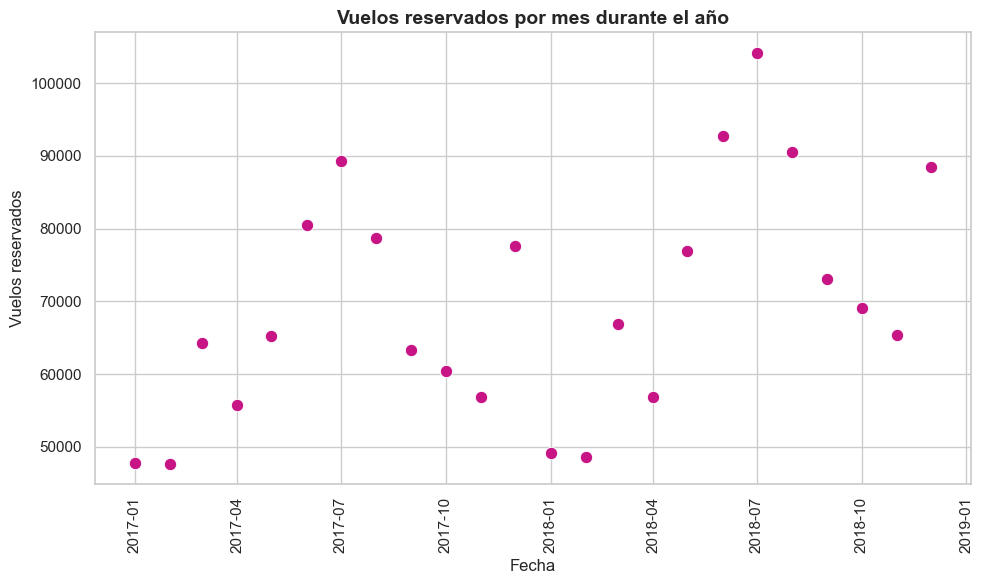

In [ ]:
# SCATTERPLOT O GRÁFICO DE DISPERSIÓN:

# Realizo un scatterplot ya que se trata de un caso bivariable numérico.(la fecha tambien se podría tomar como categórica)

# Creo una columna ficticia que unifique el mes y el año en 'Fecha' (en datatime) para poder comparar dos variables en el grafico y facilitar la visualización.

# *DAY= 1 para que se asigne el primer día de cada mes como algo simbólico.

# Añado parametros al gráfico para poder mejorarlo estéticamente como incluir título, nombre a los ejes, líneas en el fondo para facilitar la comprensión, color, tamño, etc.


vuelos_mensuales['Fecha'] = pd.to_datetime(vuelos_mensuales[['Year', 'Month']].assign(DAY=1))
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fecha', y='Flights Booked', data=vuelos_mensuales, color= 'mediumvioletred',s= 80, marker= "o")
plt.title( 'Vuelos reservados por mes durante el año', fontsize=14, fontweight='bold')
plt.ylabel('Vuelos reservados')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### __Interpretación:__

- Se observa un __patrón cíclico__ tanto en 2017 como en 2018, es decir, los vuelos __aumentan__ considerablemente en ciertos meses del año (__junio, julio, agosto y diciembre__) y __disminuyen__ en otros( __enero, febrero o abril__). 

- Esto se puede deber a las __vacaciones de verano y navidad__ donde hay un aumento del turismo, siendo el resto de meses más flojos de turismo y actividad aérea. 

- Al repetirse esta variacion esstacionaria tanto en un año como en otro podemos decir que hay una __tendencia estacional estable.__ 

- En __2018 se encuentra el pico máximo de reservas__ de vuelos alcanzado en el __mes de julio__ superando los __100.000 vuelos reservados.__

- Por último, se puede observar un __ligero aumento de la demanda en el 2018__ en todos los meses del año. Por lo que la __tendencia ha sido positiva respecto al año 2017.__

In [ ]:
# Genero dos nuevos df por año (2017 y 2018) para incluir la información por años para hacer un gráfico más específico. 

df_2017= vuelos_mensuales[vuelos_mensuales['Year']==2017]
df_2018= vuelos_mensuales[vuelos_mensuales['Year']==2018]


In [203]:
df_2017.sample(12)


,Year,Month,Flights Booked,Fecha
1,2017,2,47691,2017-02-01
7,2017,8,78692,2017-08-01
2,2017,3,64271,2017-03-01
0,2017,1,47766,2017-01-01
11,2017,12,77650,2017-12-01
5,2017,6,80493,2017-06-01
3,2017,4,55720,2017-04-01
9,2017,10,60351,2017-10-01
8,2017,9,63304,2017-09-01
4,2017,5,65279,2017-05-01


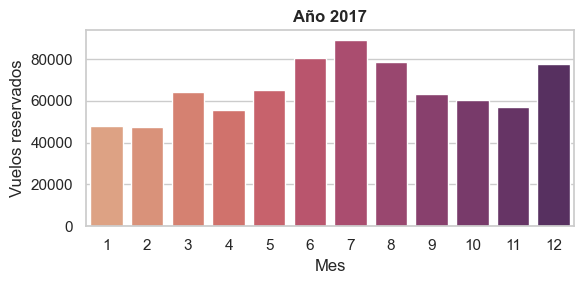

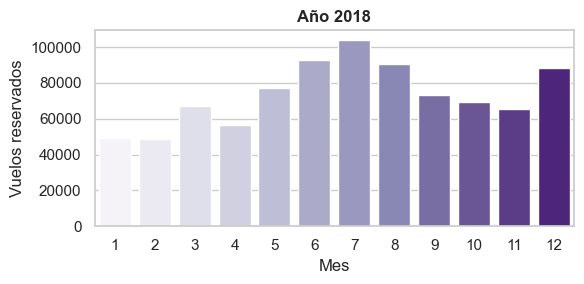

In [205]:
# Saco gráfico del año 2017 donde aparecen todos lo meses.

plt.figure(figsize=(6,3))
sns.barplot(
    data=df_2017,
    x='Month',
    y='Flights Booked',
    palette='flare'
)
plt.title('Año 2017', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.tight_layout()
plt.show()


# Saco gráfico del año 2018 donde aparecen todos los meses. 

plt.figure(figsize=(6,3))
sns.barplot(
    data=df_2018,
    x='Month',
    y='Flights Booked',
    palette='Purples'
)
plt.title('Año 2018', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.tight_layout()
plt.show()

### _Interpretación:_
- Aquí se puede ver más claramente la similitud entre ambos años en la reseva de vuelos conforme a los meses del año en base en lo interpretado en el gráfico de dispersión anterior.  

#### __2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?__

In [206]:
df_visual.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0.0,0.0,0.0,0.0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823.0,282.0,0.0,0.0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0.0,0.0,0.0,0.0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0.0,0.0,0.0,0.0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352.0,335.0,465.0,38.0


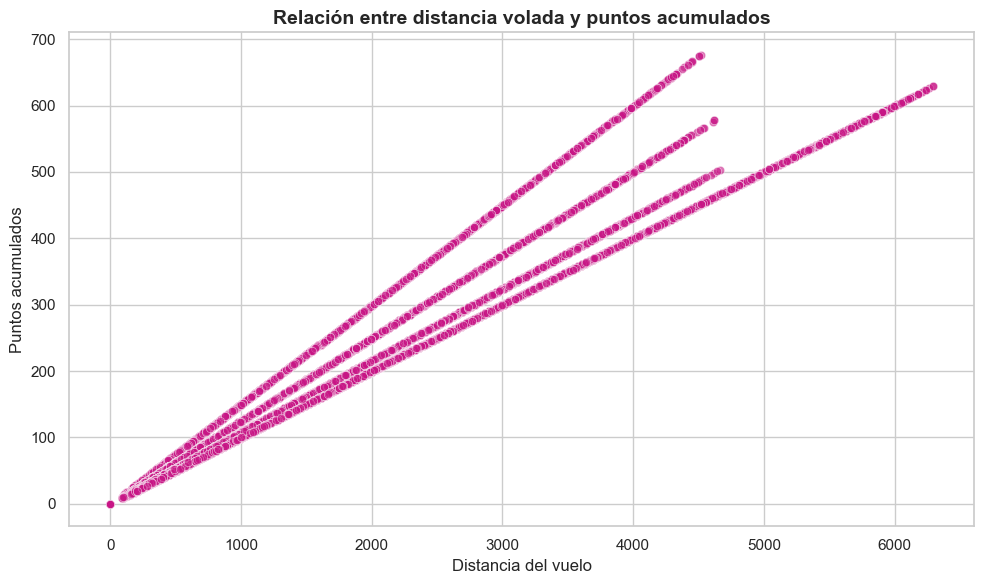

In [224]:
# SCATTERPLOT O GRÁFICO DE DISPERSIÓN:(ambas variables numéricas)

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data= df_visual,
    x='Distance',
    y='Points Accumulated',
    color='mediumvioletred',
    alpha=0.6
)

plt.title("Relación entre distancia volada y puntos acumulados", fontsize=14, fontweight='bold')
plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.tight_layout()
plt.show()

In [213]:
df_visual['Enrollment Type'].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [214]:
df_visual['Loyalty Card'].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

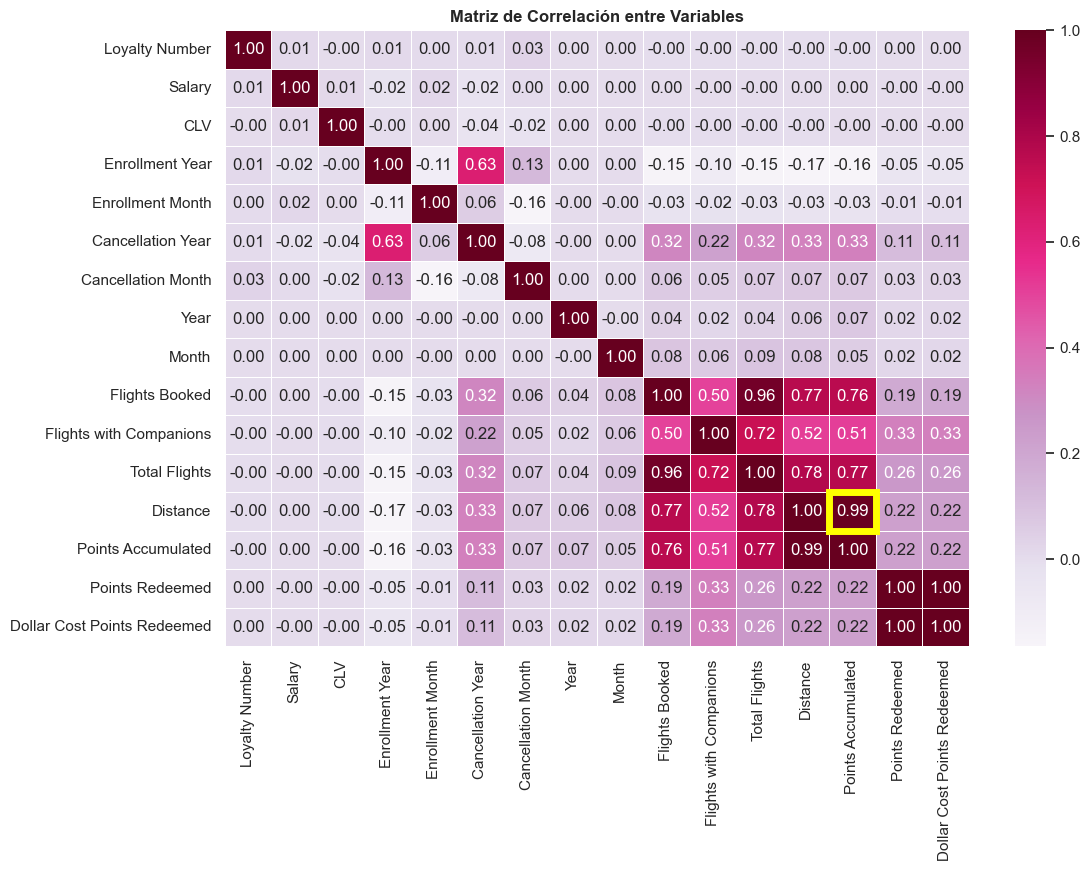

In [257]:
# Matriz de correlación: 

num_vars = df_visual.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df_visual[num_vars].corr()


# Visualizamos la matriz de correlación. 

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt='.2f', linewidths=.5)
x = correlation_matrix.columns.get_loc('Points Accumulated')
y = correlation_matrix.index.get_loc('Distance')

# Dibujar un recuadro alrededor del valor
plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='yellow', linewidth=5))
plt.title('Matriz de Correlación entre Variables', fontweight='bold')

plt.show()

### _Interpretación:_
- __Relación lineal positiva__. A mayor distancia volada, más puntos se van acumulando. Por lo que existe una dirección directa entre la distacia de vuelo y los puntos que acumulan los clientes.

- __No se observa valores atípicos__ ni dispersión relavante. 

- Las diferentes líneas pueden ser debidas a las diferentes formas de acumulación de puntos (comprobado en código anteriormente), ya sea en base a 'Loyalty Card' o a 'Enrollment Type'. No es importante, ya que en ambos casos mantiene la relación lineal positiva con la misma tendencia.
Cuando vemos que superan los 4800 kms es cuando se queda únicamente una de las categorías (formas de sumar puntos)

### _Conclusiones:_
- En este caso __no consideraría necesario realizar un REGPLOT__ ya que la tendencia y fuerza de relación entre ambas variables es claramente positiva y fuerte.

- Incluyo la __matriz de correlación__ para confirmar el __coeficiente exacto de correlación__ entre ambas variables (Distance y Points Acumulated). En este caso es __del 0.99%__. Lo que como hemos dicho indica una relación positiva fuerte y clara. Dejo señalado el valor en la matriz para una rápida visualización. 

#### __3. ¿Cuál es la distribución de los clientes por provincia o estado?__

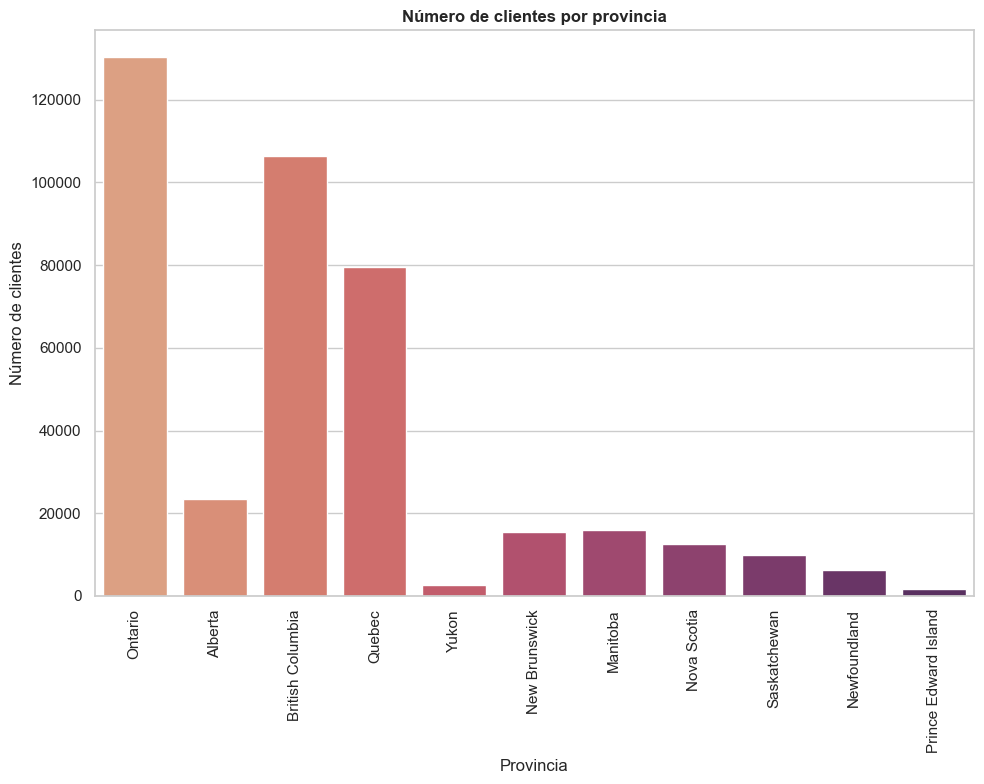

In [ ]:
# Realizo un COUNTPLOT para conocer cuantos clientes hay por cada ciudad. Variable categorica y un conteo de clientes.
# Al haber 11 ciudades se puede meter en este tipo de gráfica sin problema para que quede visualmente interpretable. 

plt.figure(figsize=(10,8))
sns.countplot(data=df_visual, x='Province', palette='flare')
plt.title('Número de clientes por provincia', fontweight='bold')
plt.xlabel('Provincia')
plt.ylabel('Número de clientes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### _Interpretación:_

- Realizo este gráfico donde podemos ver cuantos clientes pertenecen a cada provicia. Toda la muestra que tenemos es de solo un estado, Canadá.

- En __el top 3__ de nº de clientes por ciudad nos encontramos con __Ontario, British Columbia y Quebec__ (importantes ciudades con mayor población y movimientos turisticos y laborales.). El resto de ciudades tiene un número de clientes similar siendo poco llamativo, excepto Alberta y Prince Edward Island con valores muy residuales en la muestra. (ciudades más pequeñas y con menor trasiego de actividad).

- Esto puede tener que ver a la accesibilidad de los aeropuertos y a la actividad aérea de cada ciudad para que haya mas o menos clientes. 

In [ ]:
# Compruebo que la muestra solo es de un Estado. Canada. 
df_visual['Country'].unique()

array(['Canada'], dtype=object)

In [218]:
#Compruebo que todas las ciudades están reflejadas en el grafico. 

df_visual['Province'].unique()

array(['Ontario', 'Alberta', 'British Columbia', 'Quebec', 'Yukon',
       'New Brunswick', 'Manitoba', 'Nova Scotia', 'Saskatchewan',
       'Newfoundland', 'Prince Edward Island'], dtype=object)

#### __4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?__

In [188]:
# Agrupo por nivel educativo y calcular el salario promedio
promedio_por_educacion = df_visual.groupby('Education')['Salary'].mean()

# Mostrar el resultado ordenado (opcional)
print(promedio_por_educacion.sort_values(ascending=False))


Education
Doctor                  178403.675202
Master                  103734.523724
Bachelor                 72599.080913
High School or Below     61146.378165
College                      0.000000
Name: Salary, dtype: float64


In [233]:
# Detecto que hay en la columna "salary" valores negativos por equivacación, tras revisar su relación o buscar algún patrón, he llegado a la conclusión que se debe a error en la inclusión del dato. 
# utilizo abs para transformar el numero negativo en positivo. 

df_visual.loc[df_visual['Salary'] < 0, 'Salary'] = df_visual['Salary'].abs()


In [234]:
salarios_negativos = df_visual[df_visual['Salary'] < 0]
salarios_negativos

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


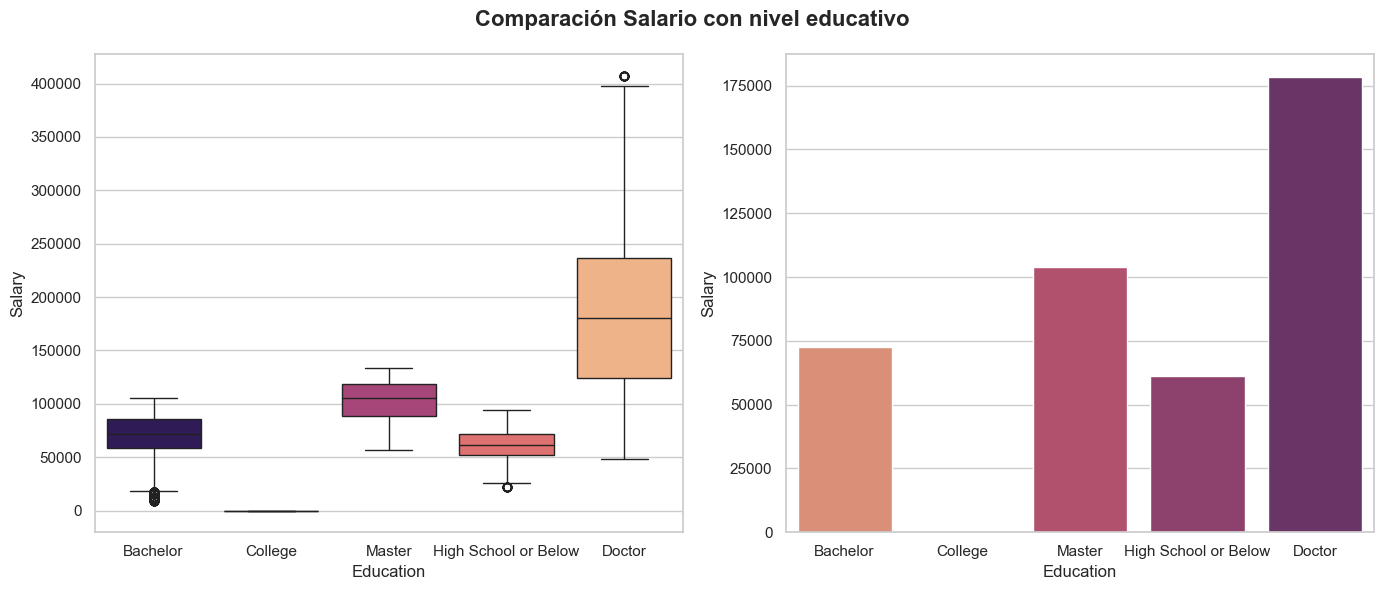

In [280]:
# comenzamos estableciendo nuestra gráfica e indicando el número de filas y columnas que queremos

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

# Creamos un BOXPLOT:

# añadimos el parametro 'y' 

sns.boxplot(x = "Education", 
            y = "Salary", 
            data = df_visual, 
            ax = axes[0], 
            palette= "magma")


# Creamos un BARPLOT:

sns.barplot(x = "Education", 
            y = "Salary", 
            data = df_visual,
            ci = None,
            ax = axes[1], 
            palette = "flare")


# añadimos título
plt.suptitle("Comparación Salario con nivel educativo", fontsize=16, fontweight='bold')

# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout()

### _Interpretación:_
Podemos observar __diferencias significativas entre los diferentes niveles educativos__. 
Como reseñable indicamos que en la categoria College no tienen un salario establecido, ya que puede que sigan siendo estudiantes. 
En el polo opuesto tenemos el nivel educativo de doctor donde tienen unos salarios mucho más alto que el resto de niveles educativos. 
__Encontramos un valor aislado u otulier en Doctor__ que indica la existencia de un salario extremo en la parte superior que el resto de niveles educativos no tienen. 
En cuanto a __distribución de los salarios__, la __mayor variabilidad__ la encontramos en en nivel educativo __Doctor__. 

### _Conclusiones:_

- __A mayor nivel educativo mayor salario__. Con un rango de posibilidades muy amplio. 
- Salarios muy similares en los niveles educativos medios. 
- Ningun tipo de salario en los aún estudiantes. 

#### __5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?__

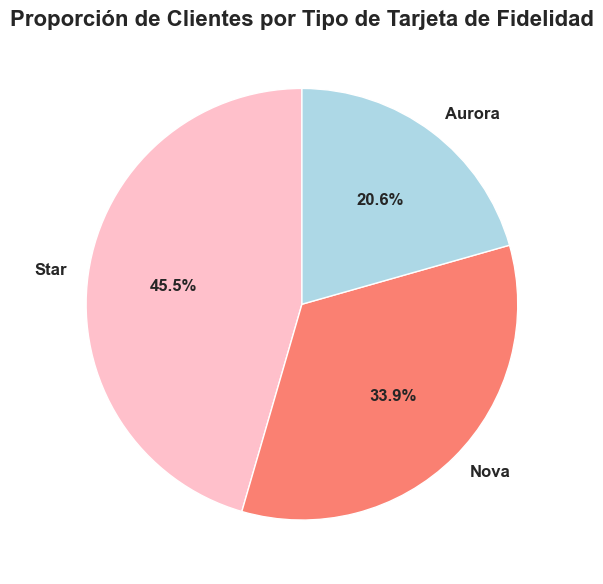

In [ ]:

# Calculo proporciones
proporcion_tarjetas = df_visual['Loyalty Card'].value_counts(normalize=True) * 100
colores = ["pink", "salmon", "lightblue"]

# Creo gráfico de tarta o PIEPLOT.
plt.figure(figsize=(6, 6))
proporcion_tarjetas.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad', fontsize=16, fontweight='bold')
plt.ylabel('')  # Oculta etiqueta del eje Y
plt.tight_layout()
plt.show()


### _Interpretación:_

- El 45% de los clientes, casi la mitad de ellos tienen la tarjeta Star. 
- El 33.9% de clientes tienen el tipo de tarjeta Nova.
- La tarjeta Aurora es la que tienen menos clientes con un 22.6%

#### __6. ¿Cómo se distribuyen los clientes segun su estado civil y género?__


    

In [225]:
tabla_pct = pd.crosstab(df_visual['Marital Status'], df_visual['Gender'], normalize='index') * 100
print(tabla_pct.round(1))

Gender          Female  Male
Marital Status              
Divorced          50.4  49.6
Married           50.0  50.0
Single            50.6  49.4


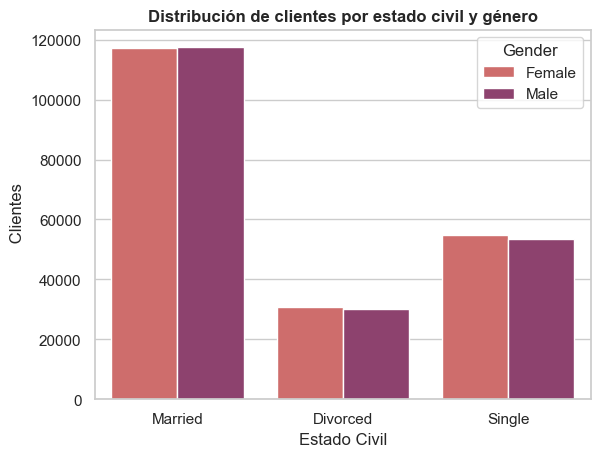

In [226]:

#COUNTPLOT:

sns.countplot(data=df_visual, x='Marital Status', hue='Gender', palette= 'flare')
plt.title('Distribución de clientes por estado civil y género', fontweight='bold')
plt.xlabel('Estado Civil')
plt.ylabel(' Clientes')
plt.show()

### _Interpretación:_

- Podemos confirmar que __la mayoría de nuestros clientes son casados/as__. 

- __No existe una diferencia reseñable entre géneros__, hay una muestra similar tanto de hombres como de mujeres. 

### BONUS FASE 3: 
### EVALUACIÓN DE DIFERENCIAS EN RESERVAS DE VUELOS POR NIVEL EDUCATIVO.

__1. Preparación de datos:__
- Filtrado de datos por columnas relevantes 'Education' y 'Flights Booked'.

In [227]:
# Filtramos las columnas relevantes 'Education' y 'Flights Booked'

df_filtrado = df_visual[['Education', 'Flights Booked']].dropna()
df_filtrado.sample(10)

,Education,Flights Booked
213057,Bachelor,9
273352,Bachelor,0
221358,Bachelor,0
229809,Bachelor,4
146491,College,9
235272,Bachelor,15
76803,Bachelor,8
19418,College,0
221603,College,0
37019,Bachelor,0


__2. Análisis descriptivo:__

- Calculo del promedio y la desviación estándar.

In [228]:
calculos = df_filtrado.groupby('Education')['Flights Booked'].agg(['mean', 'std', 'count']).reset_index().round(2)
print("Estadísticas descriptivas por nivel educativo:\n", calculos)

Estadísticas descriptivas por nivel educativo:
               Education  mean   std   count
0              Bachelor  4.11  5.22  252567
1               College  4.17  5.25  102260
2                Doctor  4.18  5.26   17731
3  High School or Below  4.18  5.24   18915
4                Master  4.20  5.21   12287


In [229]:
df_descriptivo = df_filtrado.groupby("Education")["Flights Booked"].agg(["mean", "std", "count"])
df_descriptivo

,mean,std,count
Education,,,
Bachelor,4.110288,5.221671,252567
College,4.169744,5.246040,102260
Doctor,4.175512,5.256971,17731
High School or Below,4.176209,5.239267,18915
Master,4.200700,5.213956,12287


__3. Prueba estadística:__
- Prueba hipótesis--> 

Hipótesis nula (H₀): No hay diferencia, es decir, el número de vuelos reservados no varía según el nivel educativo.

Hipótesis alternativa (H₁): El número de vuelos reservados sí varía según el nivel educativo.

In [230]:
# Tenemos 5 grupos para comparar.

df_visual['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

Normalidad para Bachelor: p-valor = 0.0000
Normalidad para College: p-valor = 0.0000
Normalidad para Master: p-valor = 0.0000
Normalidad para High School or Below: p-valor = 0.0000
Normalidad para Doctor: p-valor = 0.0000

Test de Levene (igualdad de varianzas): p-valor = 0.0150

⚠️ Al menos un grupo no es normal o varianzas distintas: aplicamos Kruskal-Wallis.
Kruskal-Wallis: H = 17.5326, p-valor = 0.0015


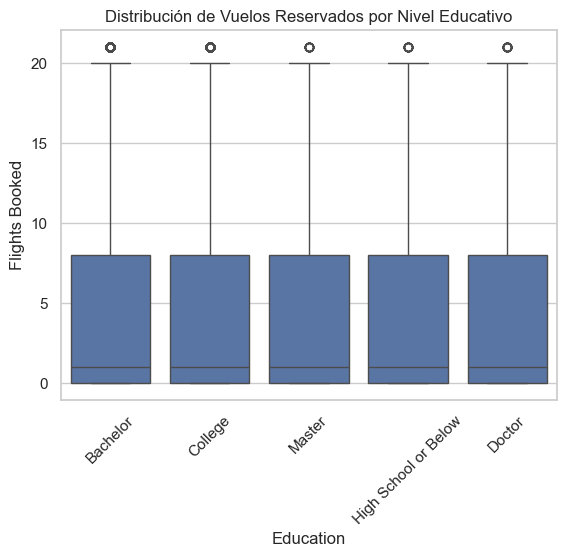

🔍 Rechazamos H0: Hay diferencias significativas entre los grupos.


In [231]:

# 1. Comprobar normalidad en cada grupo con Shapiro-Wilk
education_levels = df_filtrado['Education'].unique()
normality_results = {}

for level in education_levels:
    group_data = df_filtrado[df_filtrado['Education'] == level]['Flights Booked']
    stat, p_value = stats.shapiro(group_data)
    normality_results[level] = p_value
    print(f"Normalidad para {level}: p-valor = {p_value:.4f}")

# 2. Comprobar homogeneidad de varianzas (Levene o Bartlett)
groups = [df_filtrado[df_filtrado['Education'] == level]['Flights Booked'] for level in education_levels]
levene_stat, levene_p = stats.levene(*groups)
print(f"\nTest de Levene (igualdad de varianzas): p-valor = {levene_p:.4f}")

# 3. Elegir la prueba
    # Si todos los grupos tienen p > 0.05 en Shapiro y Levene → ANOVA
    # Si alguno no cumple → Kruskal-Wallis

if all(p > 0.05 for p in normality_results.values()) and levene_p > 0.05:
    print("\n✅ Datos normales y varianzas iguales: aplicamos ANOVA.")
    anova_stat, anova_p = stats.f_oneway(*groups)
    print(f"ANOVA: F = {anova_stat:.4f}, p-valor = {anova_p:.4f}")
else:
    print("\n⚠️ Al menos un grupo no es normal o varianzas distintas: aplicamos Kruskal-Wallis.")
    kw_stat, kw_p = stats.kruskal(*groups)
    print(f"Kruskal-Wallis: H = {kw_stat:.4f}, p-valor = {kw_p:.4f}")

# 4. Visualizar la distribución de los datos por grupo
sns.boxplot(x='Education', y='Flights Booked', data=df_filtrado)
plt.title('Distribución de Vuelos Reservados por Nivel Educativo')
plt.xticks(rotation=45)
plt.show()

# 5. Interpretación (nivel de significancia)
alpha = 0.05
if 'anova_p' in locals() and anova_p < alpha:
    print("🔍 Rechazamos H0: Hay diferencias significativas entre los grupos.")
elif 'kw_p' in locals() and kw_p < alpha:
    print("🔍 Rechazamos H0: Hay diferencias significativas entre los grupos.")
else:
    print("✅ No se rechaza H0: No hay diferencias significativas entre los niveles educativos.")


### __Interpretación prueba-hipótesis:__
- Normalidad: Todos los valores son 0.0 por lo que no hay normalidad en niguno de los grupos educativos.

- Igualdad de varianzas (test de levene): p-valor=0.0150<0.05 por lo que podemos concluir que las varianzas no son iguales. 

- Prueba aplicada Kruskal-Wallis: Como p < 0.05, se rechaza la hipótesis nula y nos quedamos con la hipótesis alternativa. 

__Conclusión:__

Hay evidencia estadistica significativa para poder afirmar que el nº de vuelos reservados varía en función del nivel educativo del cliente. 